# Lab 1
  
**Name: Sneha Gupta <br>
RegNo: 21112341 <br>
Class: 4BScEA** 
****

### **Objective:** <br>
* The main objective is to analyze the data and perform Exploratory Data Analysis(EDA).
* Clean the full dataset and tranform the data using Label Encoders.
* Identify patterns in the data using EDA.

### **Problem Definition:** <br>
1. For the given data set perform preprocessing (Taking care of Missing values,Taking care of Categorical Features, Normalization of data set) or any other required preprocessing steps to clean the dataset. <br>
2. Derive any three observations from the dataset using analytical knowledge and display the observations using graphs.

### **Methodology:** <br>
1. Import the dataset.
2. Remove null values
3. Analyze the data to check if there is a need for label encoding
4. Perform label encoding
5. Form problem statements and answer using EDA

### **Observations:** <br>
* Australia had the highest sales and UK had the lowest sales.
* San Jose had the highest quantity ordered and Boston had the lowest quantity ordered.
* This is a cross sectional dataset as it has 3 years : 2003, 2004 and 2005.
* Maximum ordered quantity is 64 andminimum is 19.

| Question Number | Status |
| --- | --- |
| 1 | Completed |
| 2 | Completed |


In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math

## Importing df

In [2]:
df = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\sales.xlsx",index_col=False)

In [3]:
df.head(5)

,ORDERNUMBER,QUANTITYORDERED,SALES,YEAR_ID,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY
0,10107,30.0,2871.00,2003,S10_1678,Land of Toys Inc.,NYC,NY,USA
1,10121,34.0,2765.90,2003,S10_1678,Reims Collectables,Reims,NaN,France
2,10134,41.0,3884.34,2003,S10_1678,Lyon Souveniers,Paris,NaN,France
3,10145,45.0,3746.70,2003,S10_1678,Toys4GrownUps.com,Pasadena,CA,USA
4,10159,49.0,5205.27,2003,S10_1678,Corporate Gift Ideas Co.,San Francisco,CA,USA


### Q1. For the given data set perform preprocessing (Taking care of Missing values,Taking care of Categorical Features, Normalization of data set) or any other required preprocessing steps to clean the dataset.

In [4]:
#Checking for null values
df.isnull().sum()

ORDERNUMBER          0
QUANTITYORDERED      7
SALES                5
YEAR_ID              5
PRODUCTCODE          6
CUSTOMERNAME         5
CITY                 5
STATE              140
COUNTRY              5
dtype: int64

In [5]:
#Dropping NA values
df = df.dropna()

In [6]:
#Reset index
df.reset_index(inplace = True, drop = True)

In [7]:
#Label Encoding
le = LabelEncoder()
le

LabelEncoder()

In [8]:
le.fit(df['STATE'])

LabelEncoder()

In [9]:
df['STATE'] = le.transform(df['STATE'])

In [10]:
df.dtypes

ORDERNUMBER          int64
QUANTITYORDERED    float64
SALES              float64
YEAR_ID             object
PRODUCTCODE         object
CUSTOMERNAME        object
CITY                object
STATE                int32
COUNTRY             object
dtype: object

In [11]:
#Log transformation
country_wise_sales = pd.DataFrame(columns = ['Country', 'Sales', 'LogScales'])
for country in df['COUNTRY'].unique():
    sales = df[df['COUNTRY']==country]['SALES'].sum()
    log_scales = math.log(sales)
    country_wise_sales = country_wise_sales.append({'Country': country, 'Sales' : sales, 'LogScales':log_scales},
                                                   ignore_index = True)

In [12]:
country_wise_sales

,Country,Sales,LogScales
0,USA,5.975956e+05,13.300670
1,Australia,2.345784e+09,21.575886
2,Canada,3.921082e+04,10.576708
3,Japan,3.509030e+04,10.465680
4,UK,4.128960e+03,8.325781


### Q2. Derive any three observations from the dataset using analytical knowledge and display the observations using graphs.

#### 1) Which Country has the highest sales?

<AxesSubplot:xlabel='Country', ylabel='LogScales'>

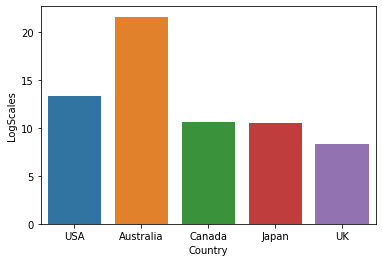

In [13]:
sns.barplot(data = country_wise_sales, y = 'LogScales', x = 'Country')

Observation : Australia had the highest sales and UK had the lowest sales.

#### 2) Which city had the highest and the lowest quantity ordered?

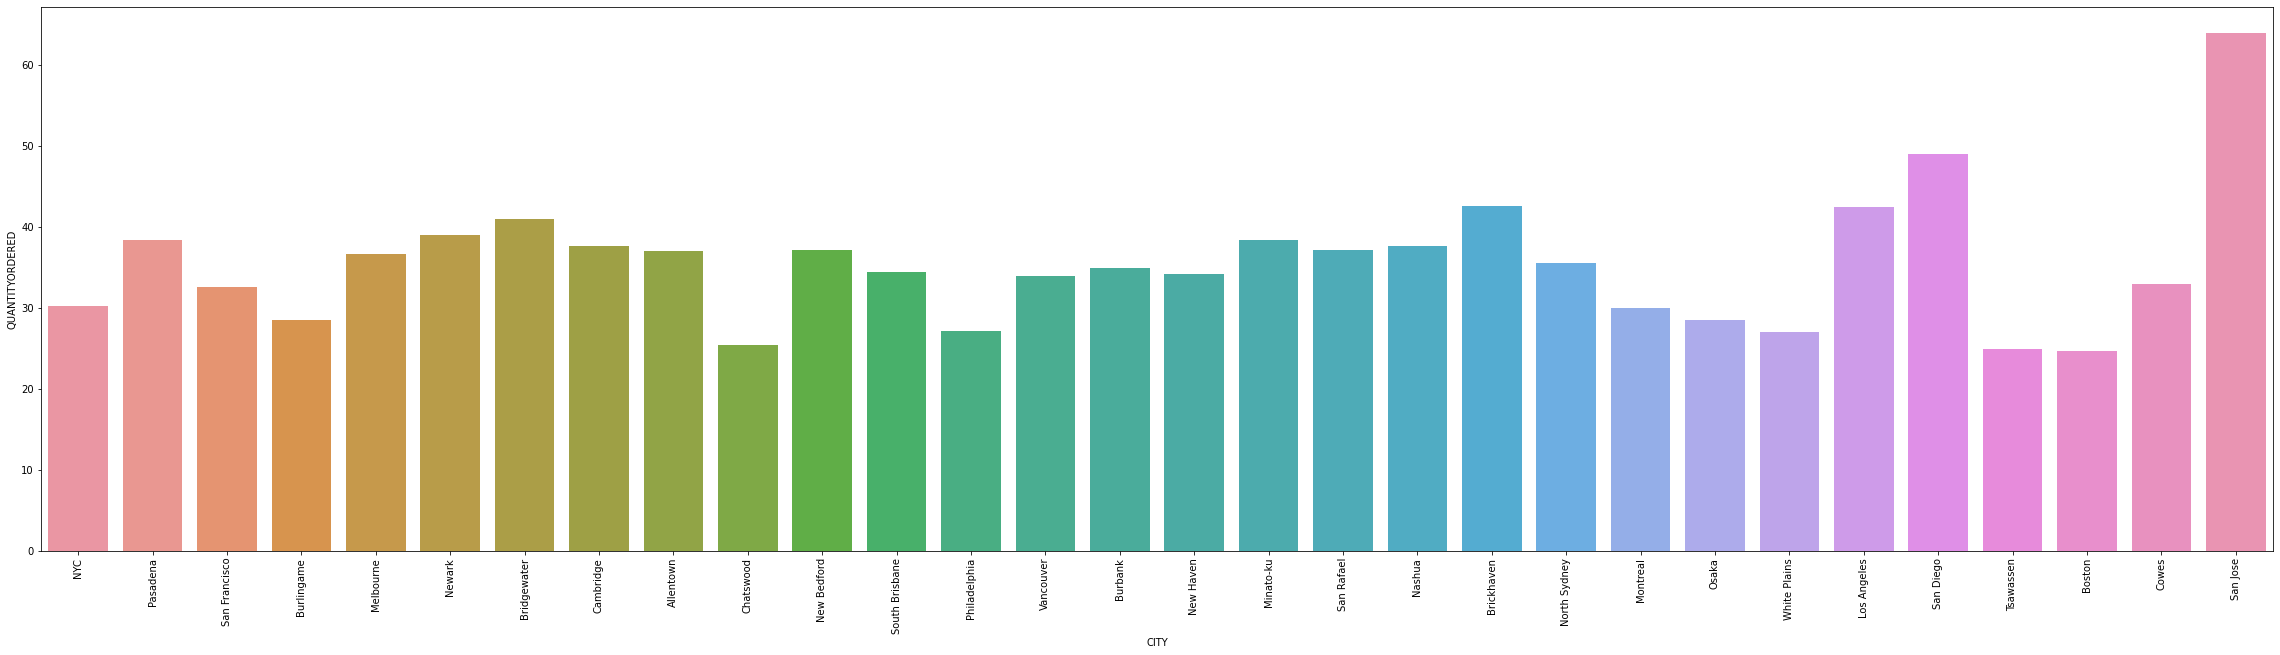

In [14]:
fig, ax = plt.subplots(figsize=(40, 10))
bar = sns.barplot(x = df['CITY'], y = df['QUANTITYORDERED'],ci=None)
bar.tick_params(axis='x', rotation=90)

Observation : San Jose had the highest quantity ordered and Boston had the lowest quantity ordered.

#### 3) Show if this is a time series or cross sectional dataset

Text(0.5, 1.0, 'YEAR_ID')

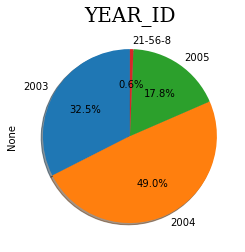

In [15]:
df.groupby('YEAR_ID').size().plot(kind='pie',shadow=True,startangle=90, autopct='%1.1f%%')

font1 = {'family':'serif','color':'black','size':20}
plt.title('YEAR_ID',fontdict = font1)

Observation : This is a cross sectional dataset as it has 3 years : 2003, 2004 and 2005.

#### 4) What is the highest and the lowest quantity ordered ?

In [16]:
print("-"*40)

maxValues = df['QUANTITYORDERED'].max() 
print("Maximum quantity ordered:","\n",maxValues)

minValues = df['QUANTITYORDERED'].min()
print("Minimum quantity ordered:","\n",minValues)

print("-"*40)

----------------------------------------
Maximum quantity ordered: 
 64.0
Minimum quantity ordered: 
 19.0
----------------------------------------


<br>